In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

terrorist = pd.read_csv("globalterrorism.csv")

C:\Users\tannu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print(terrorist.shape)

(181691, 135)


In [3]:
print(terrorist.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [4]:
terrorist.value_counts("country_txt")
# islamic states with poor government seem to have the highest number of terror attacks.

country_txt
Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Antigua and Barbuda        1
New Hebrides               1
St. Lucia                  1
South Vietnam              1
North Korea                1
Length: 205, dtype: int64

In [5]:
terrorist.value_counts("gname")

gname
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Jaish al-Muhajireen wal-Ansar (Muhajireen Army)         1
Jaish al-Islam (Libya)                                  1
Jaish Tahkim al-Din                                     1
Jaish Al-Umma (Army of the Nation)                      1
leftist guerrillas-Bolivarian militia                   1
Length: 3537, dtype: int64

In [10]:
terrorist.dropna()
#dropping null values to avoid out of index error

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,Casualities


In [2]:
#renaming the columns
terrorist.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

#adding the casualities column for more readability
terrorist['Casualities'] = terrorist.Killed + terrorist.Wounded



In [3]:
# filtering out the important data in whole dataset those I'm using further processing.
terrorist = terrorist[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Casualities']]


In [8]:
terrorist.head()
#updated dataset

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [9]:
terrorist.isnull().sum()
#missing data

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

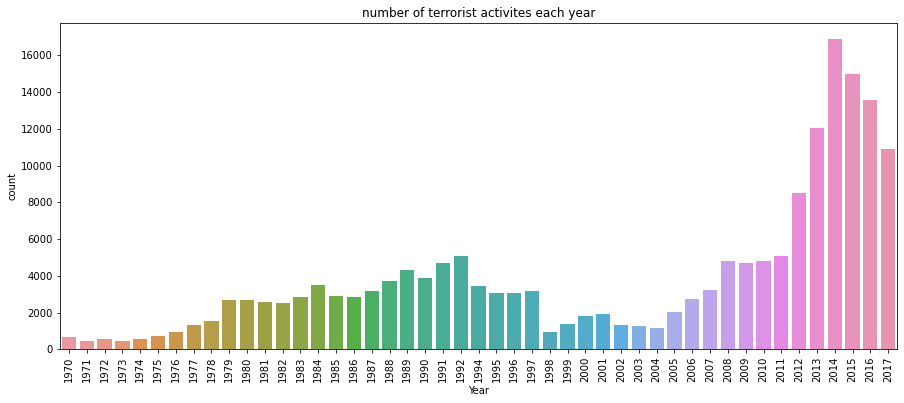

In [10]:
plt.subplots(figsize = (15,6))
sns.countplot( x = terrorist["Year"] , data = terrorist )
plt.xticks(rotation = 90)
plt.title("number of terrorist activites each year")
plt.show()

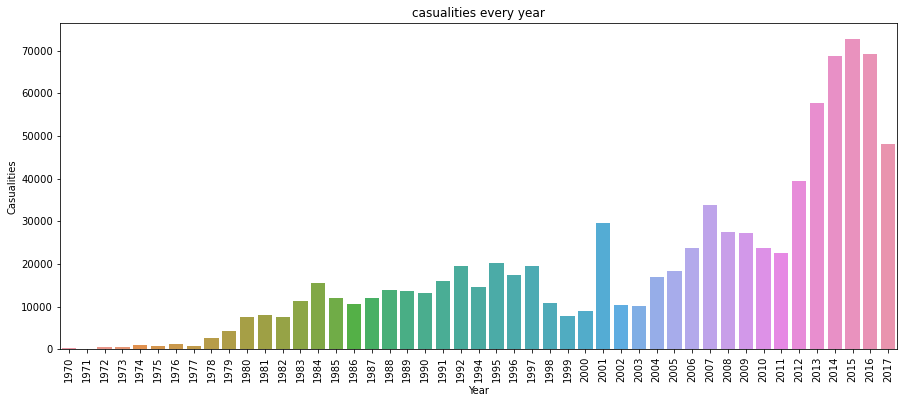

In [29]:
plt.subplots(figsize = (15,6))
year_cas = terrorist.groupby("Year").Casualities.sum().to_frame().reset_index()
year_cas.columns = ["Year","Casualities"]
sns.barplot(x = "Year" , y = "Casualities" , data = year_cas)
plt.title("casualities every year")
plt.xticks(rotation = 90)
plt.show()

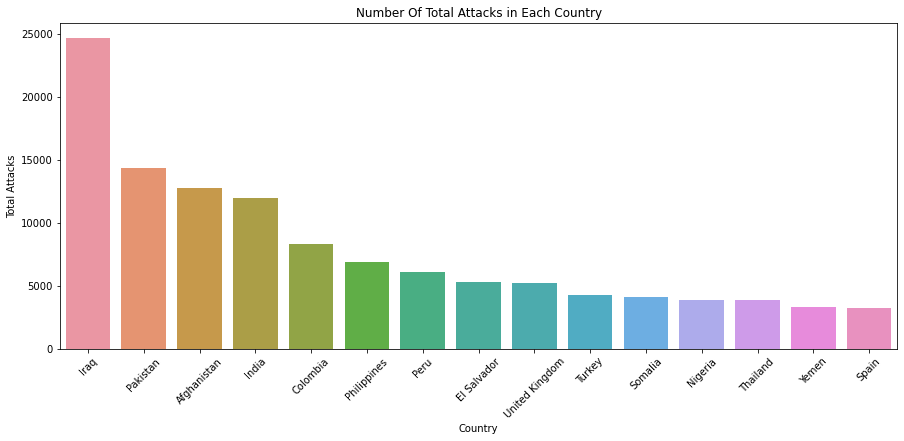

In [21]:
plt.subplots(figsize = (15,6))
country_attack = terrorist["Country"].value_counts()[:15].reset_index()
country_attack.columns = ["Country" , "Total Attacks"]
sns.barplot(x = country_attack["Country"] , y = country_attack["Total Attacks"] )
plt.xticks(rotation = 45)
plt.title("Number Of Total Attacks in Each Country")
plt.show()

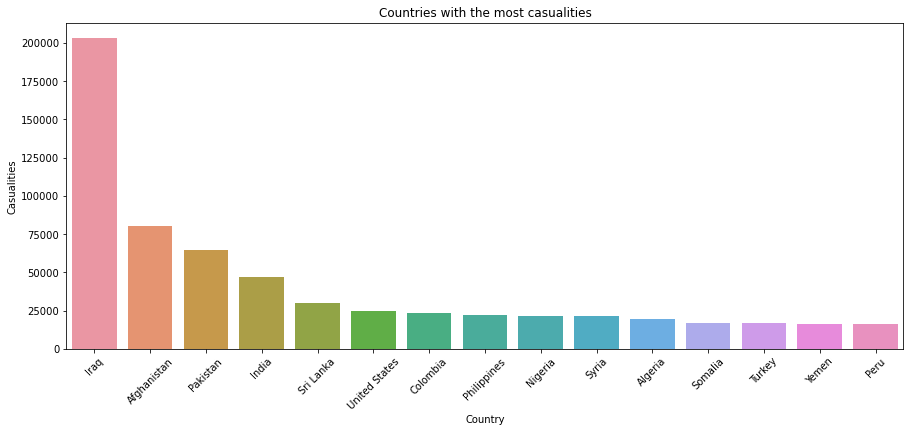

In [34]:
plt.subplots(figsize = (15,6))
country_cas = terrorist.groupby("Country").Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
country_cas.columns = ["Country" , "Casualities"]
sns.barplot(x = country_cas.Country , y = country_cas.Casualities)
plt.xticks(rotation = 45)
plt.title("Countries with the most casualities")
plt.show()

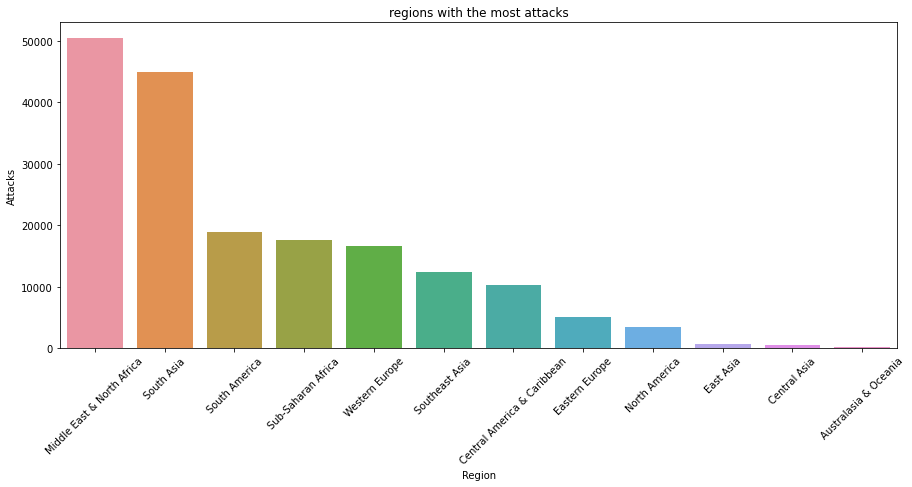

In [35]:
plt.subplots(figsize = (15,6))
region_attacks = terrorist.Region.value_counts()[:15].reset_index()
region_attacks.columns = ["Region" , "Attacks"]
sns.barplot(x = region_attacks.Region , y = region_attacks.Attacks)
plt.title("regions with the most attacks")
plt.xticks(rotation = 45)
plt.show()


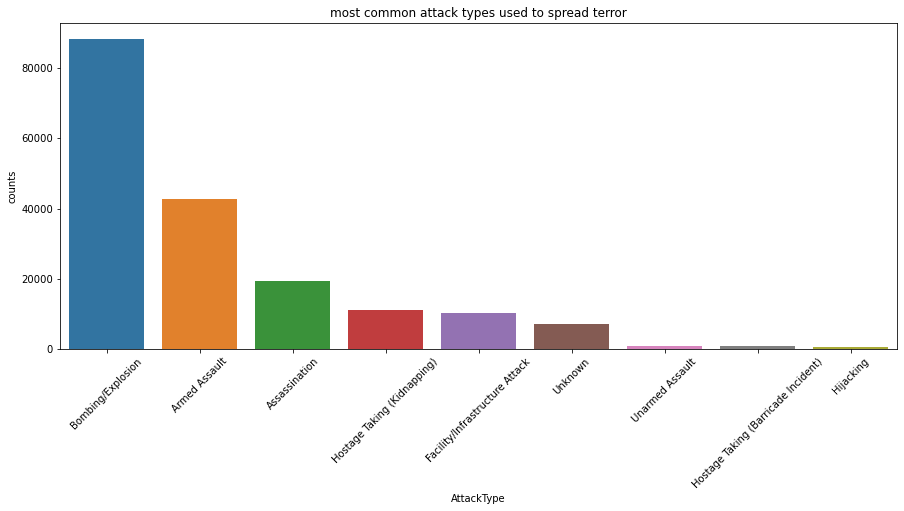

In [40]:
plt.subplots(figsize = (15,6))
atck_type = terrorist.AttackType.value_counts()[:15].reset_index()
atck_type.columns = ["AttackType","counts"]
sns.barplot(x = atck_type.AttackType , y = atck_type.counts)
plt.xticks(rotation = 45)
plt.title("most common attack types used to spread terror")
plt.show()

In [12]:
killdata = terrorist.loc[:,"Killed"]
print("number of people killed by terror attacks : ",int(sum(killdata.dropna())))

number of people killed by terror attacks :  411868


In [30]:
print("number of people killed in accordance with their countries:")
countrydata = terrorist.loc[:,"Country"]
countrykilldata = pd.concat([countrydata , killdata],axis = 1)
countrykillformatdata = countrykilldata.pivot_table(columns = "Country" , values = "Killed" , aggfunc = "sum")
countrykillformatdata


number of people killed in accordance with their countries


Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0
